In [9]:
from sortedcontainers import SortedList
from random import random
import matplotlib.pyplot as plt
from matplotlib import colors, colormaps
from math import pow
import time
import sys
from IPython.display import display, clear_output

In [10]:
def grow(t,x,y,event_stack,powr):
    # stop when edge reached
    if grid[x][y]<0:
        return False
    if grid[x][y]==0:
        # if empty set to colinised
        grid[x][y]=1
        # and add growth into the cordinates of the neighbours at a random time into the event loop 
        event_stack.add([t+pow(random()*10,powr),x+1,y])
        event_stack.add([t+pow(random()*10,powr),x-1,y])
        event_stack.add([t+pow(random()*10,powr),x,y+1])
        event_stack.add([t+pow(random()*10,powr),x,y-1])
    return True
        

In [11]:
start = time.time()
size=1000
powr=40

event_stack=SortedList([])
#set all as edge -1

grid=[[-1]*size for i in range(size)]
# set all but edge as empty 0 
for x in range(1,size-1):
    for y in range(1,size-1):
        grid[x][y]=0
# seed colony at mid point
_=grow(0,size//2,size//2,event_stack,powr)


t=0
iterations=0
flag = True
while(flag):
    # get earliest event from stack ( stack is self sorting by event time)
    e = event_stack.pop(0) 
    flag = grow(e[0],e[1],e[2],event_stack,powr)
    t=e[0]
    iterations+=1

end = time.time()
delta = end - start
ccs=(sum([i.count(1) for i in grid]))

print(f'{ccs} colonies when the edge of space reached in: {t:.3E} simulated time and {iterations} iterations and {delta:.3F} real seconds')

316224 colonies when the edge of space reached in: 9.829E+28 simulated time and 642705 iterations and 4.310 real seconds


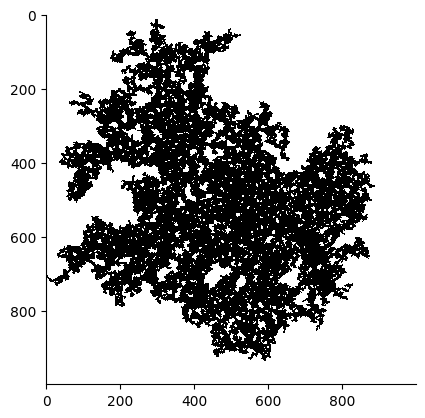

In [12]:
cmap=colors.ListedColormap(['#ffffff','#ffffff','#000000'])
fig, ax = plt.subplots()
ax.imshow(grid,cmap=cmap)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.show()

## Analysis

In [13]:
def queCount(area,size,x,y,n):
    
    def check_validity(x,y):
        if[x,y] in q or x < 1 or x >= size or y < 1 or y >= size or area[x][y] != 0:
            return False
        return True
    
    q=[[x,y]]
    count =0
    while (len(q)>0):
        x1,y1 = q.pop(0)
        area[x1][y1]=n
        count+=1
        if check_validity(x1+1,y1):
            q.append([x1+1,y1])
        if check_validity(x1-1,y1):
            q.append([x1-1,y1])
        if check_validity(x1,y1+1):
            q.append([x1,y1+1])
        if check_validity(x1,y1-1):
            q.append([x1,y1-1])
    return count


In [14]:
gaps={}
mark=2
for x in range(1,size-1):
    for y in range(1,size-1):
        if grid[x][y]==0:
            sz =queCount(grid,size-1,x,y,mark)
            if sz not in gaps:
                gaps[sz]=0
            gaps[sz]+=1
            mark+=1

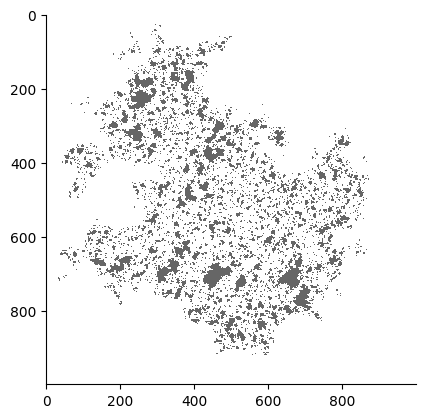

In [15]:
spaces=[[-1]*size for i in range(size)]
for x in range(1,size-1):
    for y in range(1,size-1):
        if grid[x][y]>2:
            spaces[x][y]=1
        else:
            spaces[x][y]=0
            
cmap=colors.ListedColormap(['#ffffff','#ffffff','#666666'])
fig, ax = plt.subplots()
ax.imshow(spaces,cmap=cmap)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.show()

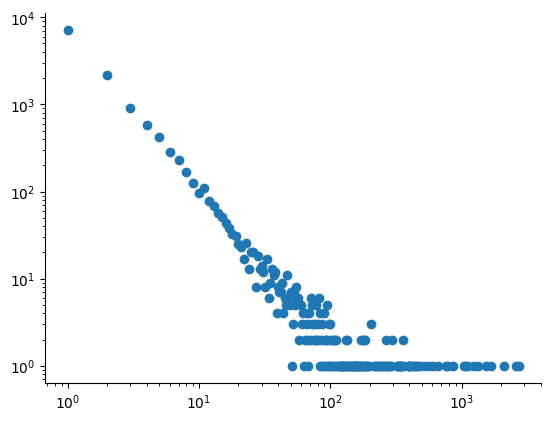

In [16]:
x=list(gaps.keys())
y=list(gaps.values())
fig, ax = plt.subplots()
ax.scatter(x[1:],y[1:])
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()